<a href="https://colab.research.google.com/github/Eswa2020/hello-world/blob/master/Esther_Wairimu_Kamau_core_indepedent_project_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
 >As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### loading the dataset

In [28]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading our datasets
df_house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

### exploring the dataset

In [4]:
df_house.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_house.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
print(df_house.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
print(df_house.shape)

(21613, 20)


In [8]:
print(df_house.isna().any())

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [9]:
print(df_house.duplicated().sum())

3


In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [11]:
print(df_house['bedrooms'].unique().tolist())
print(df_house['bathrooms'].unique().tolist())
print(df_house['floors'].unique().tolist())



[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]


In [12]:
column_values1 = df_house[["long","lat"]].values.ravel()
print(column_values1)

[-122.257    47.5112 -122.319  ...   47.5345 -122.299    47.5941]


### cleaning data

In [13]:
df_house.drop_duplicates(keep = False, inplace = True)
print(df_house.duplicated().any())

False


In [14]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580020e+09,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,2.876528e+09,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df_house.drop(['id'], axis=1)
col = list(df_house.columns)
for i in col:
  max_thresold_h_s = df_house[i].quantile(0.95)
  min_thresold_h_s = df_house[i].quantile(0.05)
  df_house2 = df_house[(df_house[i]<max_thresold_h_s) & (df_house[i]>min_thresold_h_s)]
  num = df_house.shape[0]-df_house2.shape[0]
  print(f'{num} outliers valuecount in column {i}')
  print(' ')

2162 outliers valuecount in column id
 
2175 outliers valuecount in column price
 
4907 outliers valuecount in column bedrooms
 
5226 outliers valuecount in column bathrooms
 
2231 outliers valuecount in column sqft_living
 
2163 outliers valuecount in column sqft_lot
 
19697 outliers valuecount in column floors
 
21607 outliers valuecount in column waterfront
 
21275 outliers valuecount in column view
 
15930 outliers valuecount in column condition
 
3949 outliers valuecount in column grade
 
2202 outliers valuecount in column sqft_above
 
14215 outliers valuecount in column sqft_basement
 
2206 outliers valuecount in column yr_built
 
21607 outliers valuecount in column yr_renovated
 
2408 outliers valuecount in column zipcode
 
2164 outliers valuecount in column lat
 
2220 outliers valuecount in column long
 
2201 outliers valuecount in column sqft_living15
 
2162 outliers valuecount in column sqft_lot15
 


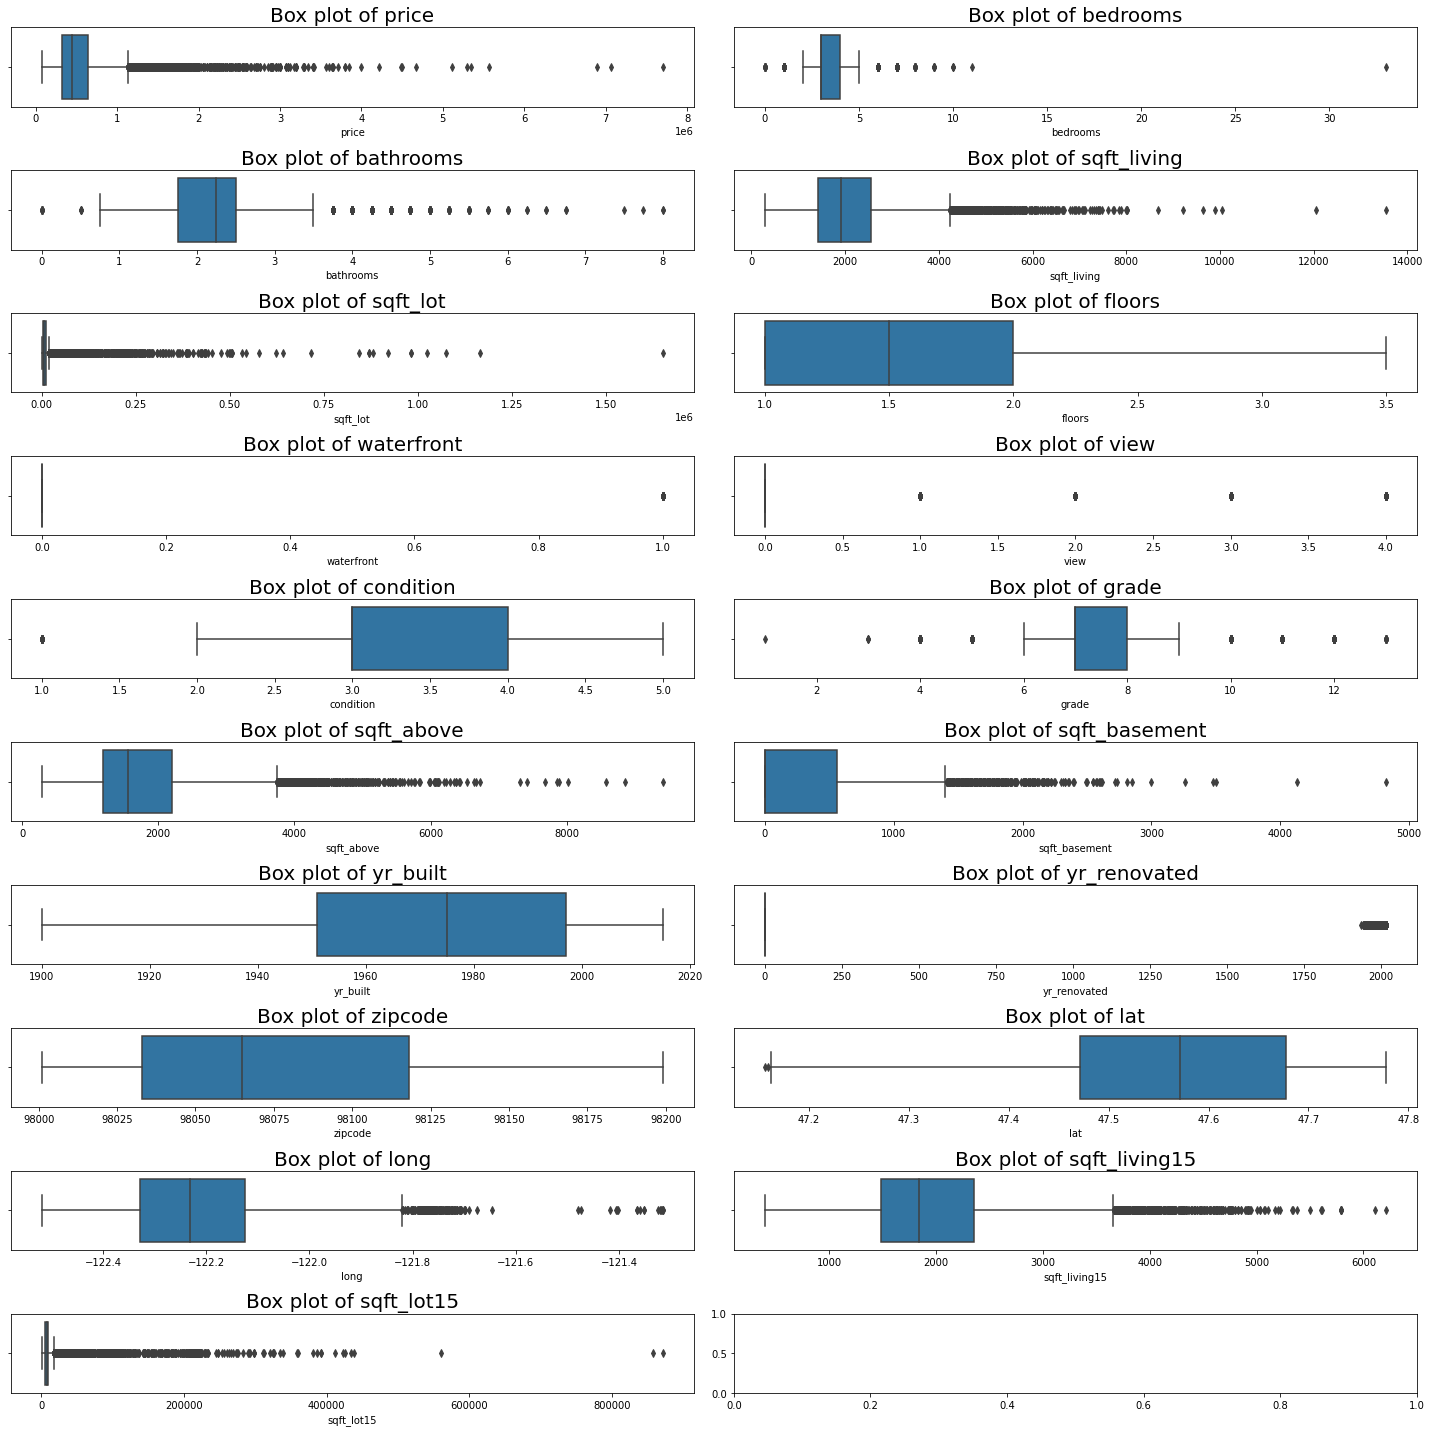

In [16]:
df_house2=df_house.drop(['id'],axis=1)
names = list(df_house2.columns)

fig, axes = plt.subplots(10,2, figsize=(20,20))  

y = 0
for name in names:
  i, j = divmod(y, 2)
  sns.boxplot(x=df_house[name], ax=axes[i, j])
  axes[i, j].set_title(f'Box plot of {name}', fontsize=20)
  y+=1

plt.tight_layout()
plt.show()


### Univariate analysis

In [17]:
df_house['price'].describe()

count    2.160700e+04
mean     5.401757e+05
std      3.674129e+05
min      7.500000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


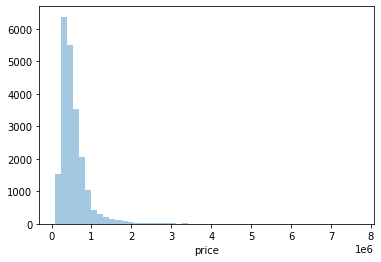

In [18]:
#histogram
sns.distplot(df_house['price'], bins=50, kde=False);


>> Given from the histogram: The price of the houses has appreciable positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:

In [19]:
print("Skewness: %f" % df_house['price'].skew())
print("Kurtosis: %f" % df_house['price'].kurt())

Skewness: 4.021219
Kurtosis: 34.512431


>> This is quite significant. At the data standardisation section, we will fix this.

In [20]:
pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [21]:
from shapely.geometry import Point
import geopanda as gpd
from geopandas import GeoDataFrame

ModuleNotFoundError: ignored

### Bivariate Analysis

>> Before we proceed with our Linear Regression implementation, we need to check whether the values are correlated, meaning the variables that we consider to be independent have an influence over the dependent variable.

For this we can use the Pearson coefficient to measure the correlation between any 2 variables. The Pearson coefficient is a value between [-1, 1] which indicates the strength and the direction of the correlation between 2 variables.

The closer the Pearson coefficient is to the margins of the interval (-1 or 1), the stronger the correlation is.
A value closer to 0 indicates a lower correlation.
A negative value indicates a negative correlation between the independent and the dependent variables. An increase in the independent variable will cause a decrease in the dependent variable.
A positive value indicates a positive correlation between the independent and the dependent variable. An increase in the independent variable will cause the dependent variable to also increase.
We can use pandas to display the correlations between each and every variable.

In [22]:
# Correlations
correlations = df_house.corr(method='pearson')
(correlations)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016810,0.001421,0.005026,-0.012221,-0.132093,0.018439,-0.002713,0.011978,-0.023590,0.008056,-0.010873,-0.005018,0.021056,-0.016469,-0.008034,-0.001832,0.020754,-0.002837,-0.138757
price,-0.016810,1.000000,0.308354,0.525146,0.702048,0.089660,0.256801,0.266333,0.397586,0.036402,0.667494,0.605572,0.323860,0.053979,0.126565,-0.053156,0.306925,0.021564,0.585391,0.082459
bedrooms,0.001421,0.308354,1.000000,0.515986,0.576677,0.031695,0.175467,-0.006584,0.079335,0.028372,0.357039,0.477637,0.303060,0.154373,0.018550,-0.152773,-0.008975,0.129474,0.391628,0.029221
bathrooms,0.005026,0.525146,0.515986,1.000000,0.754710,0.087761,0.500685,0.063750,0.188045,-0.124897,0.664997,0.685359,0.283858,0.505974,0.051020,-0.203796,0.024606,0.223052,0.568696,0.087207
sqft_living,-0.012221,0.702048,0.576677,0.754710,1.000000,0.172835,0.353958,0.103822,0.284670,-0.058783,0.762734,0.876604,0.435065,0.318149,0.055265,-0.199440,0.052512,0.240220,0.756419,0.183285
sqft_lot,-0.132093,0.089660,0.031695,0.087761,0.172835,1.000000,-0.005142,0.021598,0.074795,-0.008976,0.113667,0.183541,0.015257,0.053130,0.007712,-0.129648,-0.085677,0.229583,0.144632,0.718555
floors,0.018439,0.256801,0.175467,0.500685,0.353958,-0.005142,1.000000,0.023724,0.029205,-0.263789,0.458120,0.523864,-0.245642,0.489375,0.005973,-0.058930,0.049572,0.125266,0.279838,-0.011231
waterfront,-0.002713,0.266333,-0.006584,0.063750,0.103822,0.021598,0.023724,1.000000,0.402128,0.016652,0.082795,0.072085,0.080582,-0.026157,0.093016,0.030269,-0.014270,-0.041897,0.086475,0.030700
view,0.011978,0.397586,0.079335,0.188045,0.284670,0.074795,0.029205,0.402128,1.000000,0.045682,0.251435,0.167669,0.277046,-0.053019,0.102498,0.084849,0.005942,-0.078720,0.280369,0.072580
condition,-0.023590,0.036402,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,0.016652,0.045682,1.000000,-0.144635,-0.158211,0.174037,-0.361278,-0.061106,0.002899,-0.015002,-0.106524,-0.092883,-0.003443


>> We can also use seaborn to display a heatmap of our correlations.

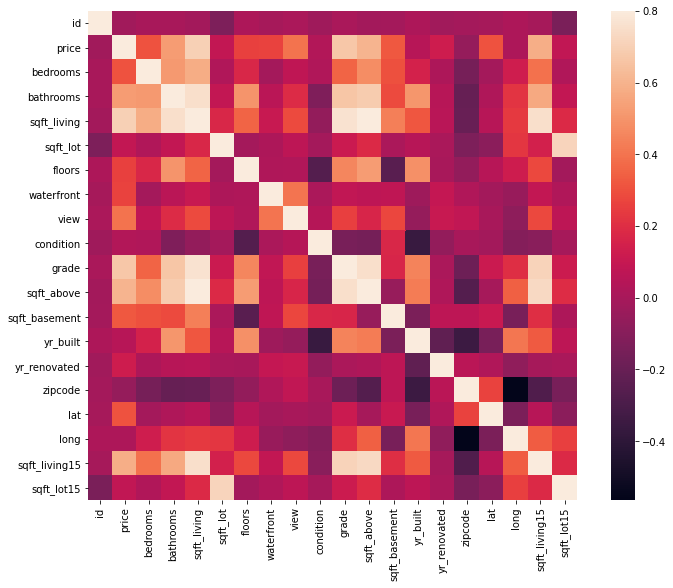

In [23]:
corrmat = df_house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

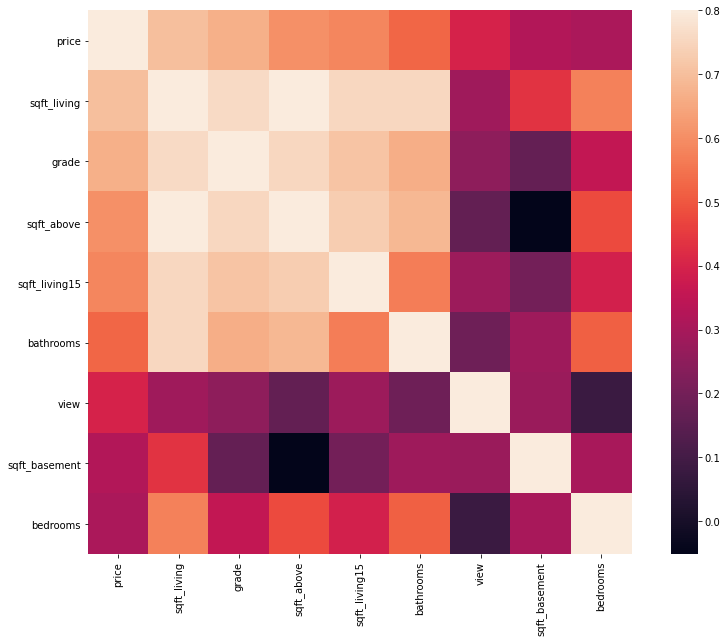

In [24]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_house[cols].corr(), vmax=.8, square=True);

>> So we can draw the conclusion that the independent variables and the dependent variable are certainly correlated (some more, some less). But still, here we can start the Linear Regression implementation. With the depemdent variable being 'HOUSE PRICE'.We can check the importance (correlation value of each variable as listed below).

In [25]:
df_house.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702048
grade            0.667494
sqft_above       0.605572
sqft_living15    0.585391
bathrooms        0.525146
view             0.397586
sqft_basement    0.323860
bedrooms         0.308354
lat              0.306925
waterfront       0.266333
floors           0.256801
yr_renovated     0.126565
sqft_lot         0.089660
sqft_lot15       0.082459
yr_built         0.053979
condition        0.036402
long             0.021564
id              -0.016810
zipcode         -0.053156
Name: price, dtype: float64

>> If the dataset has large no. of features, then it is possible that few of the features may be highly correlated. This is called as multi-collinearity.
Presence of multi-collinearity in data can destabilize the MLR model.
Due to presence of multi-collinearity, it is possible that statistically significant feature may be labelled as statistically insignificant.
Variance Inflation Factor (VIF):
It measures the magnitude of multi-collinearity. For example, to find multi-collinearity between two features X1 and X2, we build regression model between them as X1=α0+α1X2 and let R² be the R-square value for regression model.
Then variance inflation factor is given by VIF = 1/(1-R²). sqrt(VIF) of a feature is value that indicates by how much larger the standard error is increased, in presence of multicollinearity. If VIF=1 for all features, then features are not correlated. If VIF>4(threshold, some suggest 10), then we need to check the impact of multi-collinearity.lets check for multicolinearity:-

>>In this project we are going to use Python and Scikit-Learn to implement a Multiple Regression model that will try to predict house prices based on a few characteristics of those houses and historical data.(depending on our dataset)


We need to install a few dependencies before we can continue.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

>> Having loaded the dataset into a dataframe already, we can go on and  get a few interesting statistics about it.

In [35]:
# Statistics
(df_house.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580020e+09,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,2.876528e+09,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


>> Before we proceed with our Linear Regression implementation, we need to check whether the independent variables are correlated, meaning the variables that we consider to be independent have an influence over the dependent variable.

In [38]:
#We will first split our dataset into X and Y, meaning our independent and dependent variables.
# Split features and target
x = df_house.drop('price', axis=1)
y = df_house['price']


>> Now we want to perform a train-test dataset split. This means we are going to randomly select a portion of our dataset for the model training, while keeping a separate subset for model testing and evaluation. This ensures that the model is not biased and helps us obtain a better evaluation.

For this dataset we are going to use 70% of the dataset for the training set, while the remaining 30% goes to the test set.

In [43]:
# Train-test split validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15124, 19)
(6483, 19)
(15124,)
(6483,)


>> then we perform the linear regression

In [40]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

>> now our model contains our estimates for our equation parameters. We can now use these estimates to obtain our house price estimations.

In [51]:
# Test the model
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted Price')

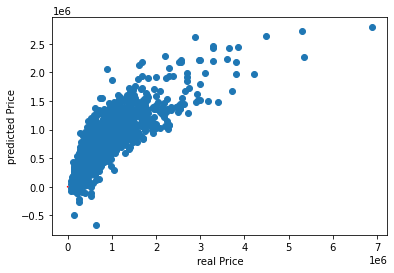

In [52]:
plt.scatter(y_test, y_pred)
plt.plot([20,50], [20,50], 'r')
plt.xlabel('real Price')
plt.ylabel('predicted Price')

>> We can lookminto our model evaluation..Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our dataset and how well the chosen model will work in the future. To avoid overfitting or underfitting, both methods use a test set (not seen by the model) to evaluate model performance.In our case we will use the RMSE 

In [53]:
# Print RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

209121.75378528415


>> How do we interpret this value? It means that for every real median house price in our dataset, our model will be wrong, on average, with about $209121753. This is such a big error, judging by the big size of our dataset.

This means that if tomorrow we register new values for the characteristics followed in the dataset, we can feed them through our model and get an estimation for the median house price in the Boston area. But we have to be aware that the estimated price will be, on average, $4753 higher or lower than the actual value. The error might be larger, smaller, but on average it's $4753.

In [49]:
accuracy = model.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 70%'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X): 
    X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['Column'] = X.columnsvif_factors['VIF'] = vif
    return vif_factors
vif_factors = get_vif_factors(X[X_features])
vif_factors
